### Importing Libraries ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install statsmodel == 0.12.1
!pip install pmdarima



zsh:1: = not found


In [144]:
import statsmodels
import statsmodels.api as sm 
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Loading the data set ###

In [145]:
data = pd.read_csv('/Users/franciscajara/Desktop/project cities/datasets/time series about cities.csv')

In [146]:
data.head(10)

,City,State,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,2017_08,2017_09,...,2022_06,2022_07,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03
0,New York,NY,0.0011,0.0093,0.0088,0.0203,0.0102,0.0077,-0.0042,-0.0082,...,0.0310,0.0154,0.0046,-0.0082,-0.0196,-0.0256,-0.0263,-0.0096,0.0017,0.0055
1,Los Angeles,CA,-0.0008,0.0023,-0.0074,0.0024,0.0048,0.0018,0.0096,0.0027,...,0.0053,0.0044,0.0006,-0.0023,-0.0065,-0.0075,-0.0066,-0.0027,0.0019,-0.0009
2,Chicago,IL,0.0107,0.0102,0.0132,0.0103,0.0091,0.0007,-0.0056,-0.0027,...,0.0197,0.0109,0.0018,-0.0051,-0.0090,-0.0147,-0.0114,-0.0038,0.0076,0.0145
3,Houston,TX,-0.0042,-0.0037,-0.0013,0.0044,-0.0011,-0.0039,-0.0061,0.0056,...,0.0081,0.0054,0.0013,-0.0007,-0.0026,-0.0038,-0.0052,-0.0013,0.0025,0.0077
4,Philadelphia,PA,0.0006,-0.0067,0.0123,0.0215,0.0138,0.0018,-0.0075,-0.0084,...,0.0184,0.0104,-0.0008,-0.0065,-0.0071,-0.0116,-0.0126,-0.0116,0.0045,0.0107
5,Phoenix,AZ,0.0089,0.0133,0.0131,0.0197,0.0059,0.0030,-0.0085,0.0010,...,0.0048,0.0026,-0.0031,-0.0100,-0.0118,-0.0072,-0.0032,-0.0036,-0.0044,-0.0021
6,San Antonio,TX,-0.0055,-0.0006,0.0101,0.0034,0.0011,0.0030,0.0012,-0.0041,...,0.0108,0.0087,0.0057,-0.0031,-0.0100,-0.0097,-0.0049,-0.0011,0.0033,0.0039
7,San Diego,CA,0.0049,0.0160,0.0166,0.0140,0.0118,0.0046,0.0004,-0.0076,...,0.0225,0.0153,0.0036,-0.0054,-0.0103,-0.0141,-0.0137,-0.0070,0.0010,0.0094
8,Dallas,TX,0.0030,-0.0010,0.0110,0.0140,0.0088,0.0042,-0.0033,-0.0003,...,0.0213,0.0147,0.0035,-0.0044,-0.0102,-0.0103,-0.0099,-0.0053,-0.0024,0.0065
9,San Jose,CA,0.0162,0.0134,0.0160,0.0120,0.0055,0.0030,-0.0026,-0.0059,...,0.0220,0.0160,0.0075,-0.0078,-0.0186,-0.0219,-0.0169,-0.0024,0.0119,0.0128


In [147]:
data_austin = pd.read_csv('/Users/franciscajara/Desktop/project cities/datasets/time series austin.csv')                                                 

In [148]:
print(type(data_austin))

<class 'pandas.core.frame.DataFrame'>


In [149]:
data_austin.head()

,Month,Growth rate
0,2017-02-01,0.0004
1,2017-03-01,-0.0012
2,2017-04-01,0.0063
3,2017-05-01,0.0088
4,2017-06-01,0.0091


In [150]:
# Converting the data type for variable Growth rate to integer
data_austin['Growth rate'] = data_austin['Growth rate'].astype(float)

In [151]:
data_austin.head()

,Month,Growth rate
0,2017-02-01,0.0004
1,2017-03-01,-0.0012
2,2017-04-01,0.0063
3,2017-05-01,0.0088
4,2017-06-01,0.0091


In [152]:
# Converting the Month column data type to datetime
data_austin['Month'] = pd.to_datetime(data_austin['Month'])

In [153]:
print(data_austin.dtypes)

Month          datetime64[ns]
Growth rate           float64
dtype: object


In [154]:
# set the Month column as the row index
data_austin = data_austin.set_index('Month')

In [155]:
data_austin.head()

,Growth rate
Month,
2017-02-01,0.0004
2017-03-01,-0.0012
2017-04-01,0.0063
2017-05-01,0.0088
2017-06-01,0.0091


In [156]:
data_austin.tail(5)

,Growth rate
Month,
2022-11-01,-0.0139
2022-12-01,-0.0159
2023-01-01,-0.0035
2023-02-01,0.0039
2023-03-01,0.0009


In [157]:
print(data_austin.dtypes)

Growth rate    float64
dtype: object


## Visualizing the time series and decomposing it ##

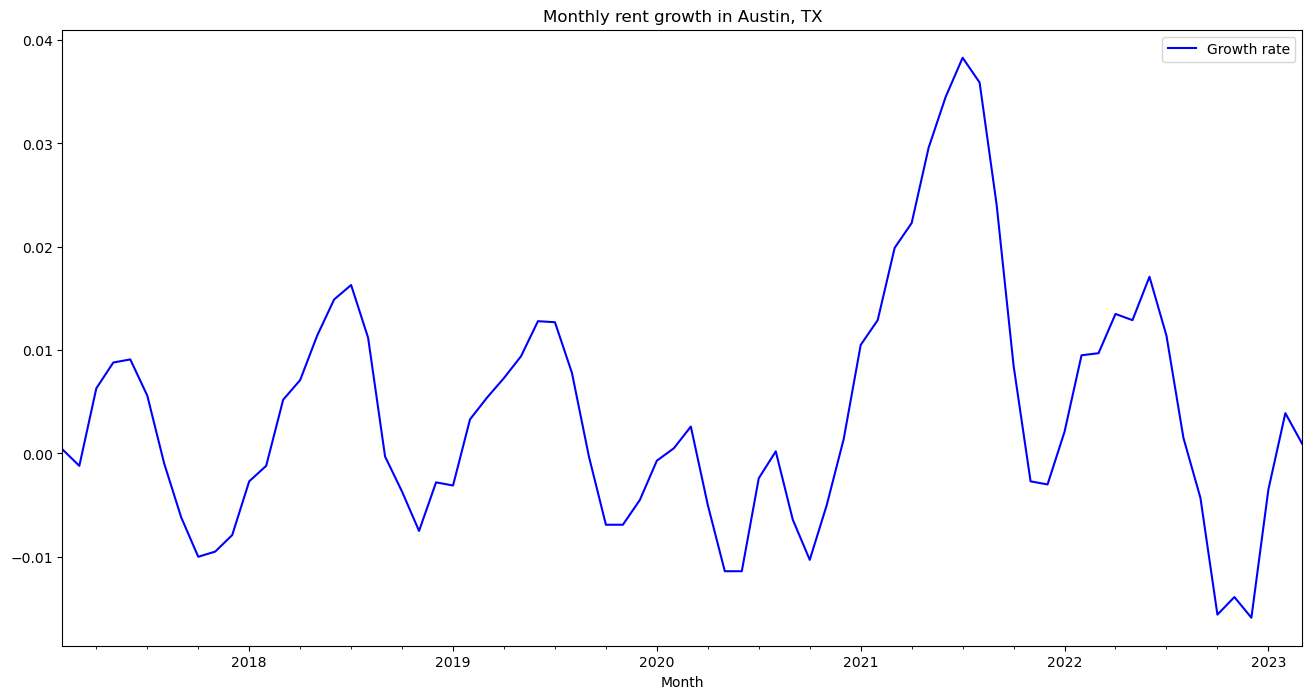

In [158]:
ax = data_austin.plot(color = 'blue', figsize = (16, 8))
ax.set_title('Monthly rent growth in Austin, TX')
plt.show()

In [159]:
decomposition = sm.tsa.seasonal_decompose(data_austin, model='additive')


In [160]:
#creating an empty dataframe to store the individual components
decomposed_data = pd.DataFrame()

In [161]:
#extracting the trend component of time series
decomposed_data['trend'] = decomposition.trend

In [162]:
#extracting the seasonal component of time series
decomposed_data['seasonal']= decomposition.seasonal

In [163]:
#extracting the white noise or residual component of time series
decomposed_data['random_noise'] = decomposition.resid

Text(0.5, 1.0, 'Residual')

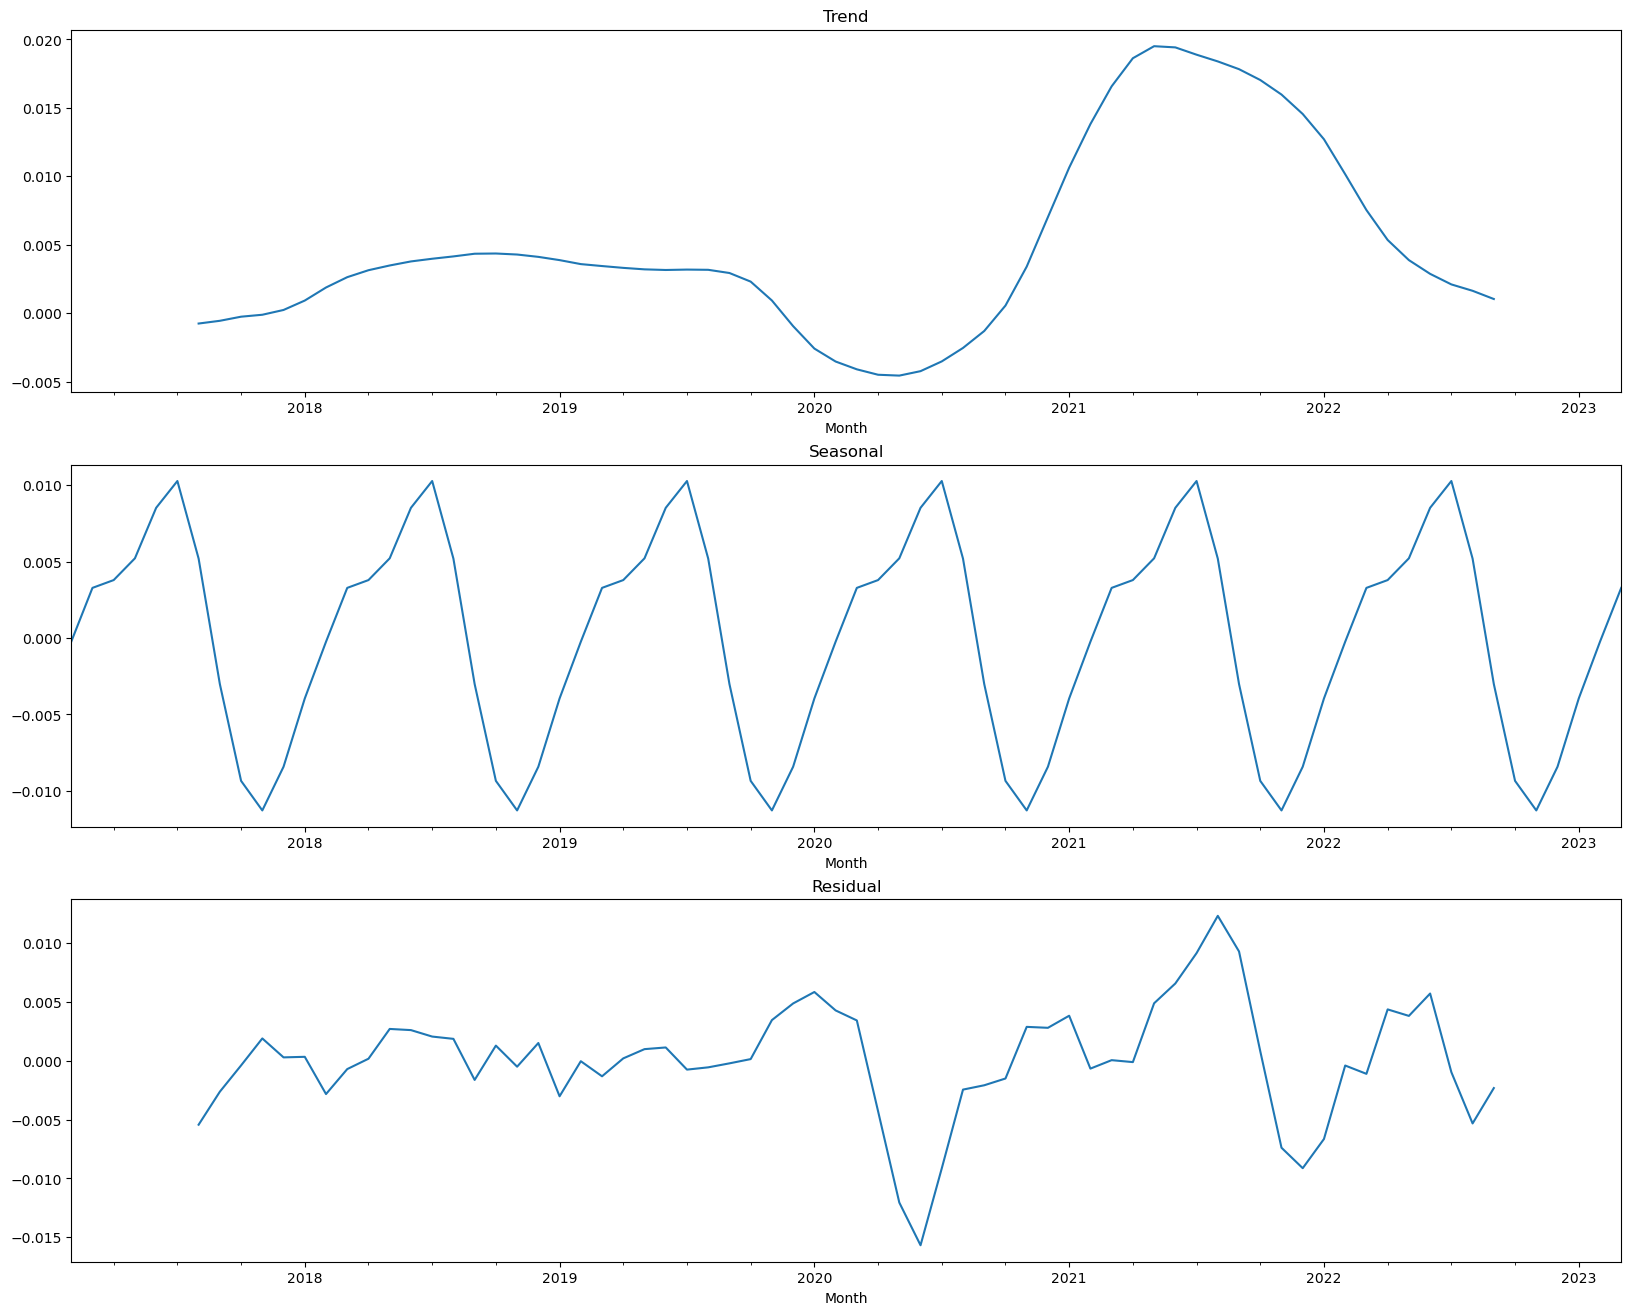

In [164]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 16))

decomposed_data['trend'].plot(ax = ax1).set_title('Trend')

decomposed_data['seasonal'].plot(ax = ax2).set_title('Seasonal')

decomposed_data['random_noise'].plot(ax = ax3).set_title('Residual')

### Splitting the dataset for training ###
Best pratices considered:
* Test set split within 20% - 30% of the whole time series
* Both train and test sets contain a representative sample of each season
* Evaluation using multiple splits

In [165]:
#defining the training and testing dataset
train_data = data_austin.loc['2017-02-01' : '2021-06-01']
test_data = data_austin.loc['2021-06-01':]

ConversionError: Failed to convert value(s) to axis units: array([Period('2017-02', 'M'), Period('2017-03', 'M'),
       Period('2017-04', 'M'), Period('2017-05', 'M'),
       Period('2017-06', 'M'), Period('2017-07', 'M'),
       Period('2017-08', 'M'), Period('2017-09', 'M'),
       Period('2017-10', 'M'), Period('2017-11', 'M'),
       Period('2017-12', 'M'), Period('2018-01', 'M'),
       Period('2018-02', 'M'), Period('2018-03', 'M'),
       Period('2018-04', 'M'), Period('2018-05', 'M'),
       Period('2018-06', 'M'), Period('2018-07', 'M'),
       Period('2018-08', 'M'), Period('2018-09', 'M'),
       Period('2018-10', 'M'), Period('2018-11', 'M'),
       Period('2018-12', 'M'), Period('2019-01', 'M'),
       Period('2019-02', 'M'), Period('2019-03', 'M'),
       Period('2019-04', 'M'), Period('2019-05', 'M'),
       Period('2019-06', 'M'), Period('2019-07', 'M'),
       Period('2019-08', 'M'), Period('2019-09', 'M'),
       Period('2019-10', 'M'), Period('2019-11', 'M'),
       Period('2019-12', 'M'), Period('2020-01', 'M'),
       Period('2020-02', 'M'), Period('2020-03', 'M'),
       Period('2020-04', 'M'), Period('2020-05', 'M'),
       Period('2020-06', 'M'), Period('2020-07', 'M'),
       Period('2020-08', 'M'), Period('2020-09', 'M'),
       Period('2020-10', 'M'), Period('2020-11', 'M'),
       Period('2020-12', 'M'), Period('2021-01', 'M'),
       Period('2021-02', 'M'), Period('2021-03', 'M'),
       Period('2021-04', 'M'), Period('2021-05', 'M'),
       Period('2021-06', 'M')], dtype=object)

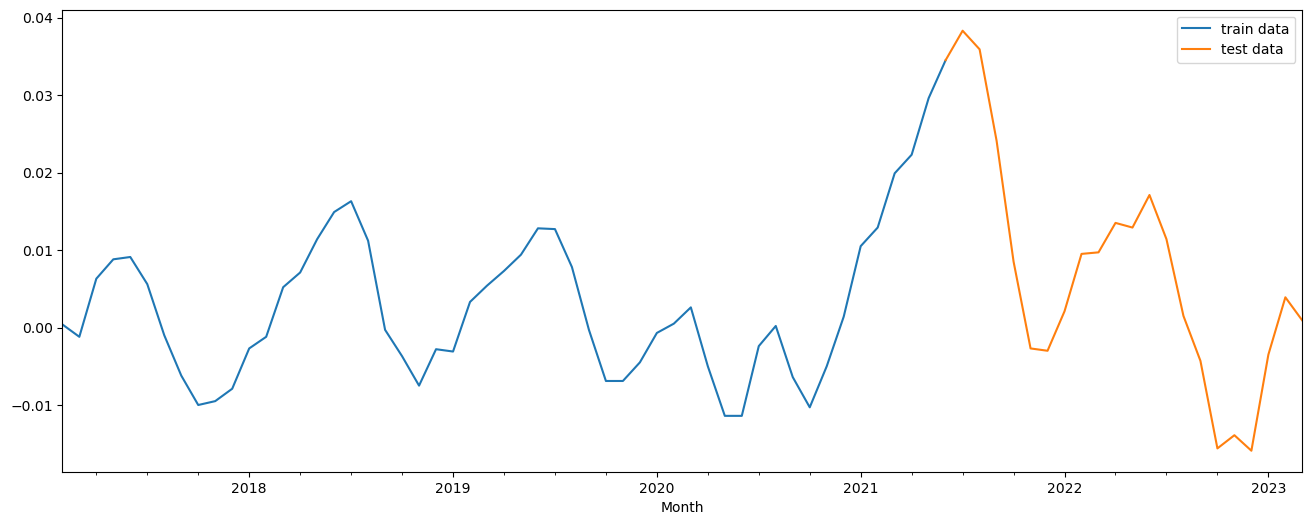

In [166]:
#visualizing train and test datasets in the same plot
fig, ax = plt.subplots(figsize = (16, 6))

# Plotting train data
train_data.plot(ax = ax)

# Plotting test data
test_data.plot(ax = ax)

# Adding the legends in sequential order
plt.legend(['train data', 'test data'])

# Showing the time which divides the original data into train and test
plt.axvline(x = '2021-06-01', color = 'black', linestyle = '--')

# Showing the plot
plt.show()

### Checking for stationarity (HERE MIGHT BE THE PROBLEM) ###

In [172]:
#Applying the Seasonal Decomposition of Time Series (STL) method to the time series data:
stl = STL(train_data['Growth rate'], period=12)  # 12 represents the seasonal period, adjust as needed
result = stl.fit()

In [169]:
#Extract the trend, seasonal, and residual components:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

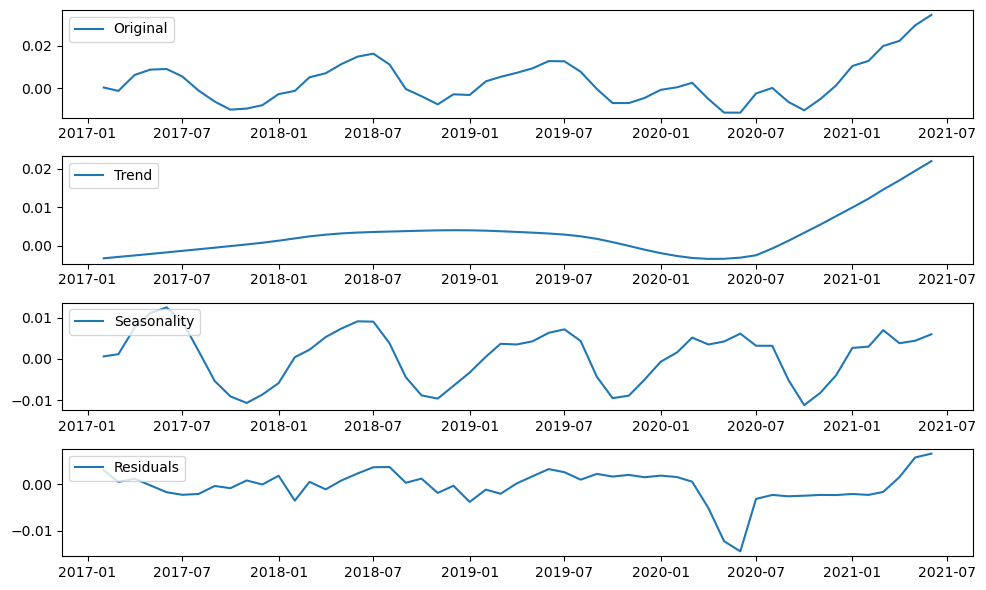

In [174]:
#Visualize the components:
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(train_data['Growth rate'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

#This code will produce a plot with four subplots, showing the original time series, the trend component, the seasonal component, and the residual component, respectively. 
#Note that the STL method assumes that the time series is additive, meaning that the seasonal component is constant over time.

In [167]:
#Applying the Augmented Dicky-Fuller test. Null hypothesis is the time series is non stationary. The alternate hypothesis is the time series is stationary.
#importing ADF test from statsmodels package
from statsmodels.tsa.stattools import adfuller

#implementing ADF test on the original time series data
result = adfuller(train_data['Growth rate'])
print(result[0])
print(result[1]) 
print(result[4])

-1.820699654467826
0.3702343887872753
{'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}


In [97]:
print(result)

(-1.820699654467826, 0.3702343887872753, 11, 41, {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}, -332.9041973676841)


Observation: The p-value is 0.37, much higher than 0.05 so it failed to reject the null hypothesis, meaning, this time series is non-stationary.

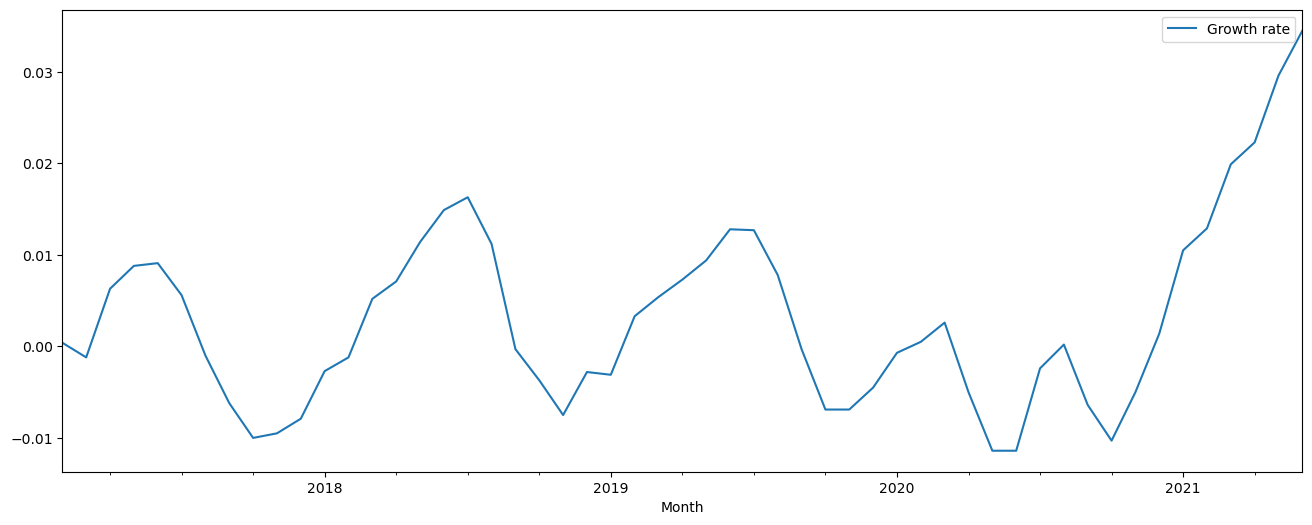

ADF Statistic: -1.820699654467826
p-value: 0.3702343887872753


In [98]:
#Implementing ADF test on the original time series
result = adfuller(train_data['Growth rate'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data.plot(ax=ax)

plt.show()

print('ADF Statistic:', result[0])

print('p-value:', result[1])

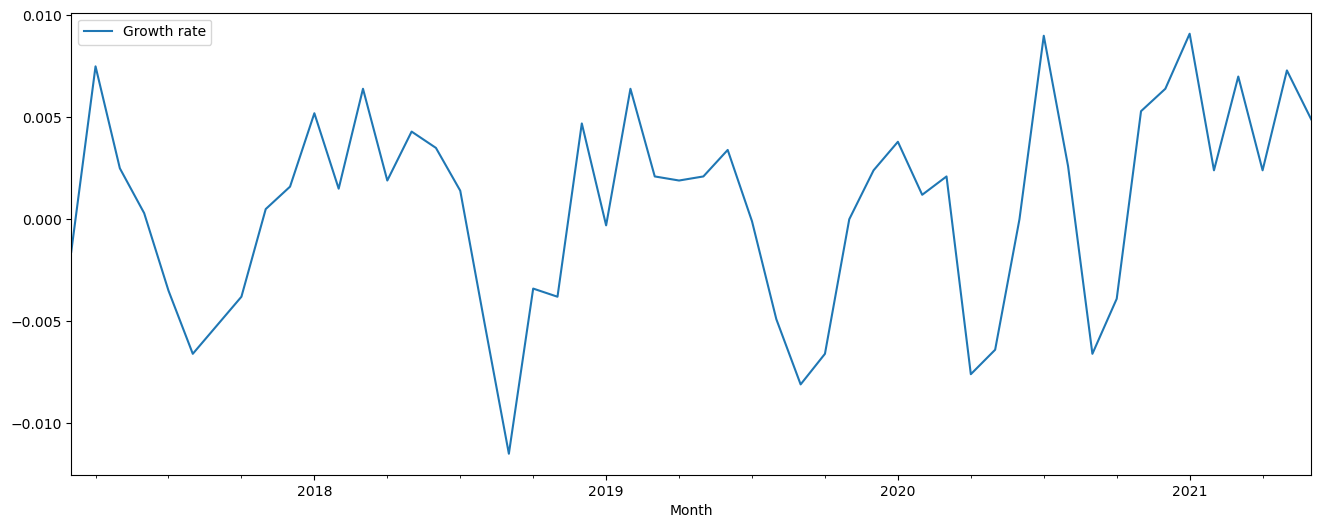

ADF Statistic: -2.8900540903887446
p-value: 0.04651685612610158


In [99]:
#Taking the first order differencing of the time series
train_data_stationary = train_data.diff().dropna()
result = adfuller(train_data_stationary['Growth rate'])
fig, ax = plt.subplots(figsize = (16,6))

train_data_stationary.plot(ax = ax)

plt.show()
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Observation: now the p-value is 0.04, way below 0.05 so we reject the null hypothesis and finally say that this time series is stationary. This parameter is the Integration parameter (denoted by d) in ARIMA modeling. So, now we have d=1.

## ACF and PACF plots ##

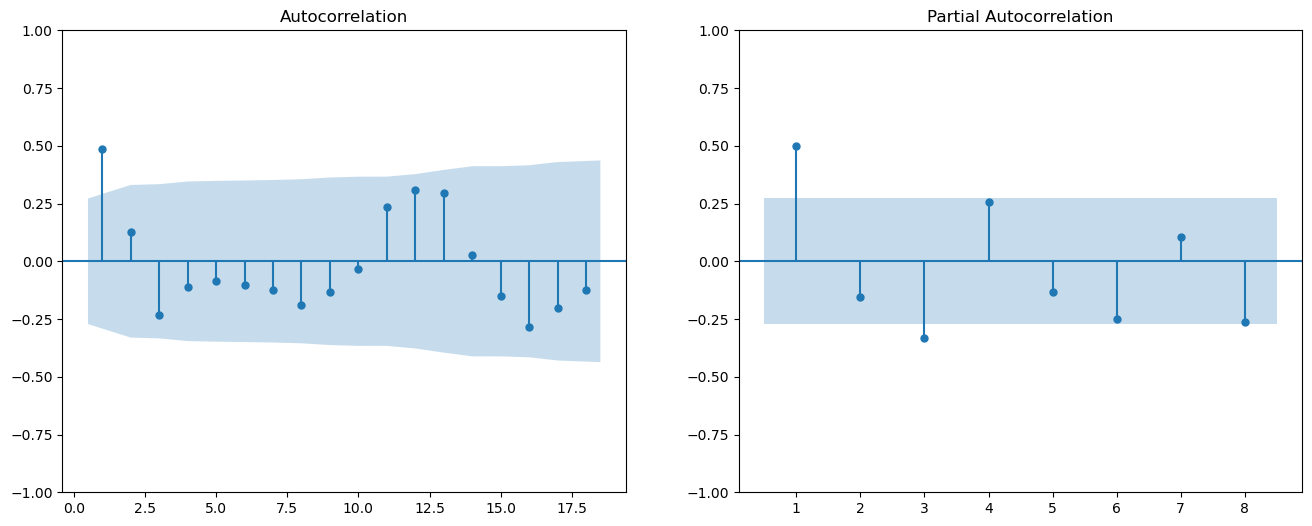

In [100]:
#Plotting to find p and q parameters

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
tsaplots.plot_acf(train_data_stationary, zero = False, ax = ax1)
tsaplots.plot_pacf(train_data_stationary, zero = False, ax = ax2, lags = 8)

plt.show()

Observations: Here we have a few points that are statistical significant, meaning strong correlation between this data and them. In ACF, we can see point 1, and in PACF we can see point 1, 3, and even 8 to a strecht. So these are the parameters we would like to use.

## (elaborate something like this, describing MAPE model, AIC and RMSE?) ##
Model evaluation criterion
Model can make wrong predictions as:

Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.
Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer.
Which case is more important?
If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

How to reduce the losses?
Company would want Recall to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives.

## AR Modeling ##

In [101]:
#AR Model with parameter p = 1
ar_1_model = ARIMA(train_data_stationary, order = (1, 0, 0))

#AR Model with parameter p = 2
ar_2_model = ARIMA(train_data_stationary, order = (2, 0, 0))

#AR Model with parameter p = 3
ar_3_model = ARIMA(train_data_stationary, order = (3, 0, 0))

#AR Model with parameter p = 4
ar_4_model = ARIMA(train_data_stationary, order = (4, 0, 0))

In [102]:
#Now training the models
ar_1_results = ar_1_model.fit()

ar_2_results = ar_2_model.fit()

ar_3_results = ar_3_model.fit()

ar_4_results = ar_4_model.fit()

In [103]:
print(ar_4_results.summary())

                               SARIMAX Results                                
Dep. Variable:            Growth rate   No. Observations:                   52
Model:                 ARIMA(4, 0, 0)   Log Likelihood                 216.007
Date:                Wed, 19 Apr 2023   AIC                           -420.015
Time:                        22:45:16   BIC                           -408.307
Sample:                    03-01-2017   HQIC                          -415.526
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.586      0.558      -0.002       0.003
ar.L1          0.6475      0.160      4.051      0.000       0.334       0.961
ar.L2          0.0363      0.143      0.253      0.8

In [108]:
def plot_predicted_output(results, ax):

    #here I am creating a variable with the forecasted values, adding the last element of the training data to the forecasted values to get back to the original scale (for the differencing I did before)
    forecasted_values = (results.forecast(steps=22)) + train_data.iloc[-1][0]
    
    #Setting indices of the test data into prediction values
    forecasted_values.index = test_data.index
    
    # Computing the AIC and RMSE metrics for the model and printing it into title of the plot
    train_data.plot(ax = ax, label = 'train', 
                    title = 'AIC: {}'.format(np.round(results.aic, 1)) + 
                           ' , ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_data, forecasted_values)), 1)))
    
    #Plotting the test data
    test_data.plot(ax = ax) 
    
    #Plotting the forecasted data
    forecasted_values.plot(ax = ax)
    
    #Adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

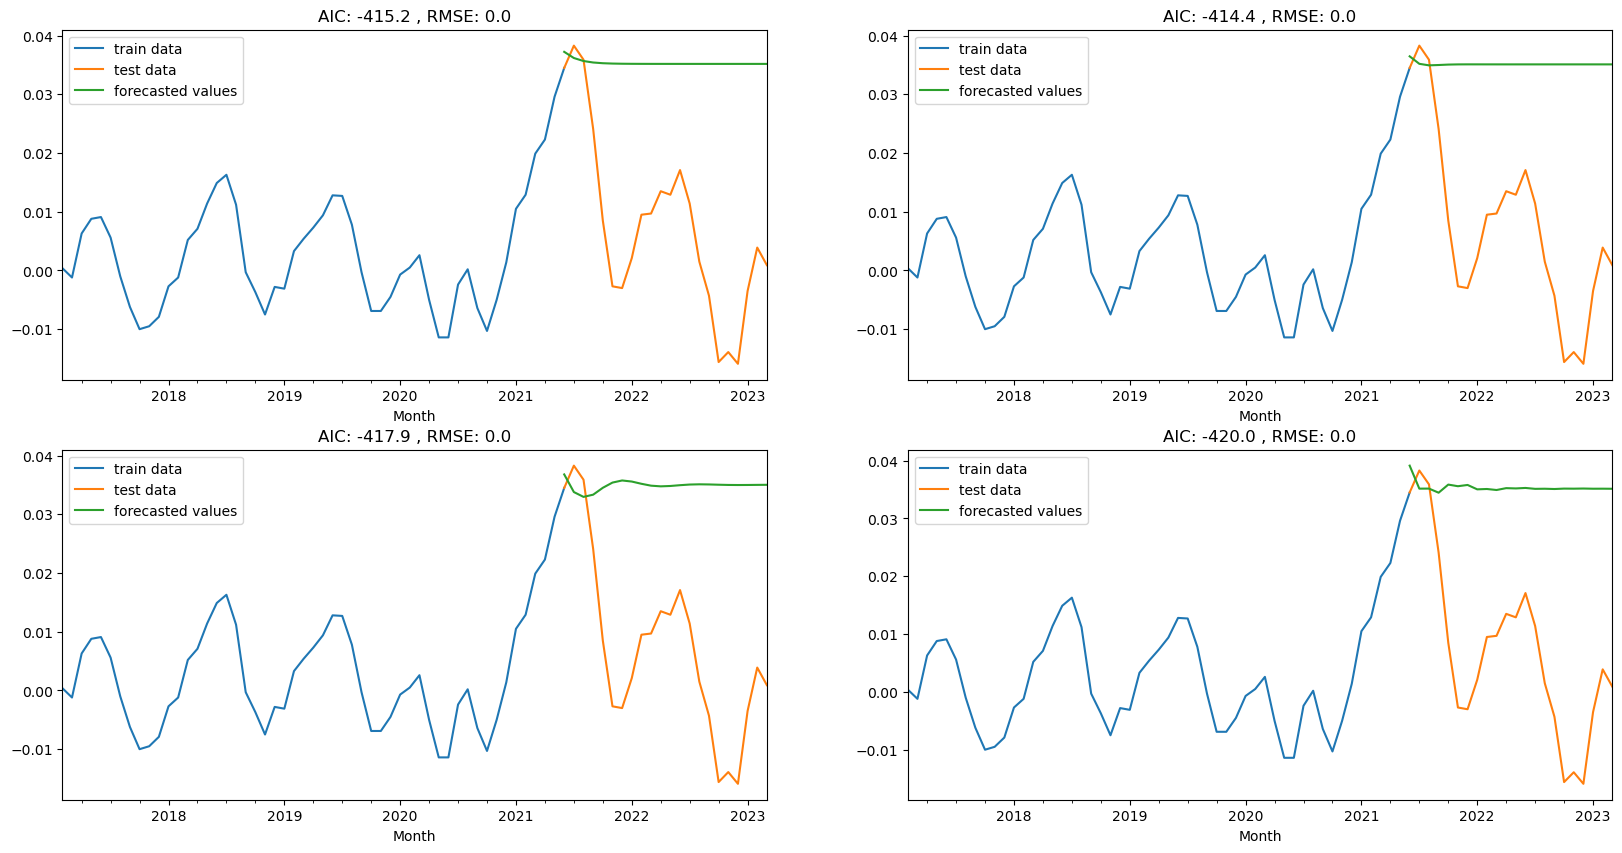

In [109]:
#Plotting forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ar_1_results, ax1)

plot_predicted_output(ar_2_results, ax2)

plot_predicted_output(ar_3_results, ax3)

plot_predicted_output(ar_4_results, ax4)

plt.show()

In [58]:
print(forecasted_values)

2021-07-01    0.039143
2021-08-01    0.035162
2021-09-01    0.035172
2021-10-01    0.034460
2021-11-01    0.035864
2021-12-01    0.035582
2022-01-01    0.035801
2022-02-01    0.035040
2022-03-01    0.035102
2022-04-01    0.034926
2022-05-01    0.035249
2022-06-01    0.035199
2022-07-01    0.035283
2022-08-01    0.035127
2022-09-01    0.035147
2022-10-01    0.035099
2022-11-01    0.035169
2022-12-01    0.035157
2023-01-01    0.035182
2023-02-01    0.035149
2023-03-01    0.035154
2023-04-01    0.035142
Freq: MS, Name: predicted_mean, dtype: float64


In [63]:
#Setting indices of the test data into prediction values
forecasted_values.index = test_data.index

In [65]:
#Plotting the test data
test_data.plot(ax = ax) 
    
#Plotting the forecasted data
forecasted_values.plot(ax = ax)
    
#Adding the legends sequentially
ax.legend(['train data', 'test data', 'forecasted values'])

NameError: name 'plot_predicted_output' is not defined

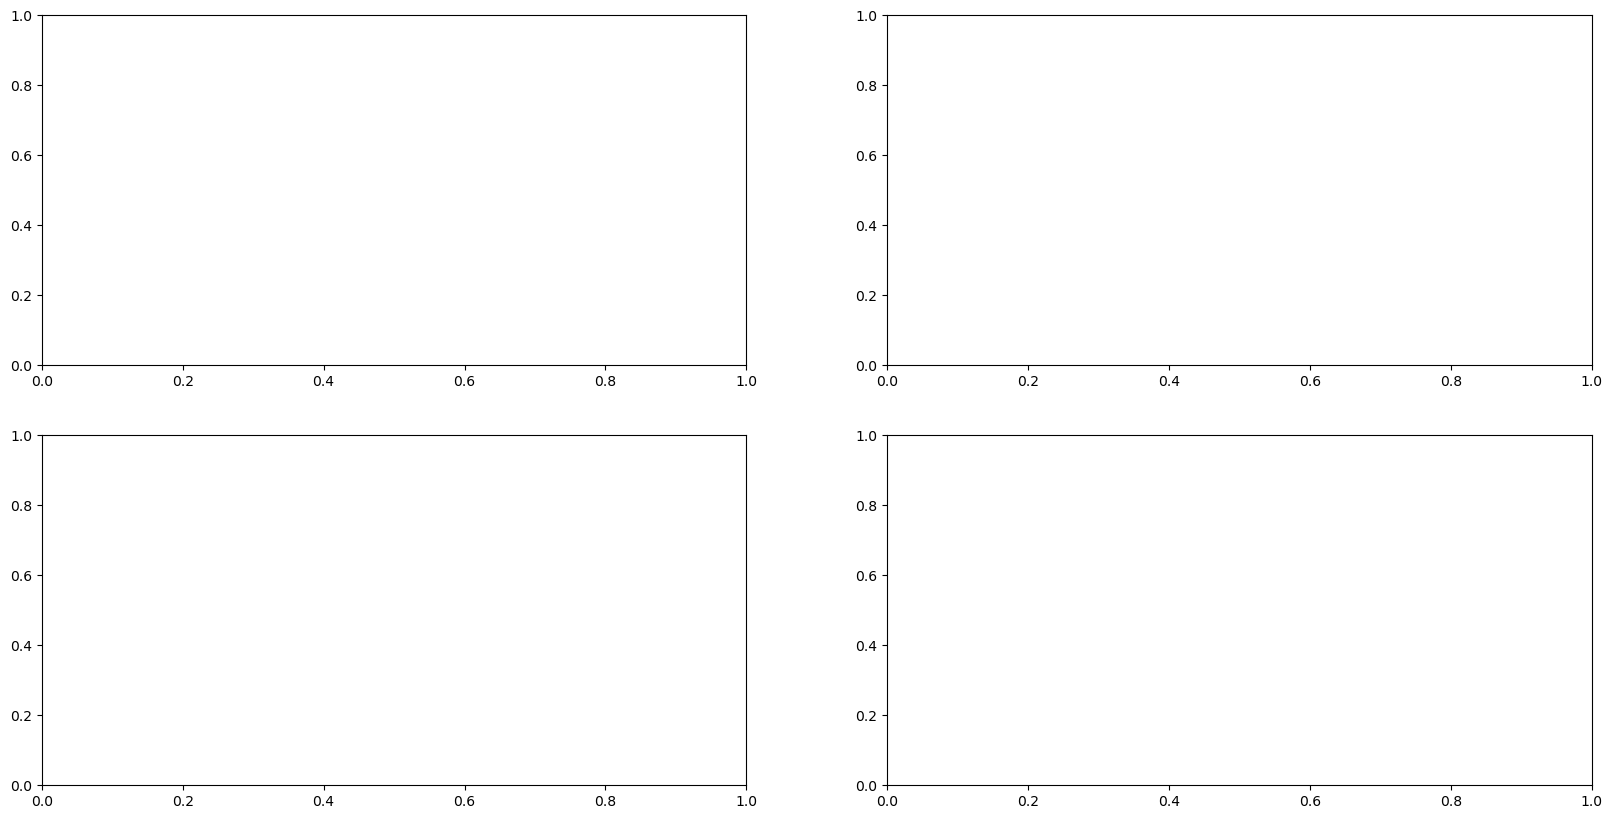

In [66]:
#Plotting forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ar_1_results, ax1)

plot_predicted_output(ar_2_results, ax2)

plot_predicted_output(ar_3_results, ax3)

plot_predicted_output(ar_4_results, ax4)

plt.show()

In [ ]:
def plot_predicted_output(results, ax):
    
    # We are taking the cumulative sum of forecasted values (which is inverse of one differencing)
    # And we are also adding the last element of the training data to the forecasted values to get back to the original scale
    predictions = np.cumsum(np.cumsum(results.predict(start = 19, end = 25))) + train_data.iloc[-1][0]
    
    # Setting indices of the test data into prediction values
    predictions.index = test_data.index
    
    # Computing the AIC and RMSE metrics for the model and printing it into title of the plot
    train_data.plot(ax = ax, label = 'train', 
                    title = 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ' , ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_data, predictions)), 2)))
    
    # Plotting the test data
    test_data.plot(ax = ax) 
    
    # Plotting the forecasted data
    predictions.plot(ax = ax)
    
    # Adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])